# TITANIC SURVIVAL PREDICTION

* Use the Titanic dataset to build a model that predicts whether a
   passenger on the Titanic survived or not. This is a classic beginner
   project with readily available data.

* The dataset typically used for this project contains information
  about individual passengers, such as their age, gender, ticket
  class, fare, cabin, and whether or not they survived.

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('C:\\Users\\Akash Kumbharkar\\Desktop\\CODSOFT\\titanik_survival_prediction\\Titanic-Dataset.csv')

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df[['Age','Cabin','Embarked']]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# for handling the missing values from age 


In [10]:
df["Age"].isnull().sum()

177

In [11]:
df["Age"].fillna(df["Age"].median(),inplace = True)

In [12]:
df["Age"].isnull().sum()

0

In [13]:
df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [14]:
df["Cabin"].isnull().sum()

687

In [15]:
#drop cabin column

In [16]:
df.drop(columns= "Cabin",inplace = True)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
df["Embarked"].isnull().sum()

2

In [19]:
#fill missing values for Embarked

In [20]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [21]:
df["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [22]:
#Encoded Categorical Values 

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [23]:
df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [24]:
df['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [25]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,2


In [26]:
# Feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [27]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,2
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,2
3,1,1,35.0,1,0,53.1000,2
4,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,2
887,1,1,19.0,0,0,30.0000,2
888,3,1,28.0,1,2,23.4500,2
889,1,0,26.0,0,0,30.0000,0


In [28]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,0,45.5,0,0,28.5000,2
733,2,0,23.0,0,0,13.0000,2
382,3,0,32.0,0,0,7.9250,2
704,3,0,26.0,1,0,7.8542,2
813,3,1,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,1,21.0,0,0,7.6500,2
270,1,0,28.0,0,0,31.0000,2
860,3,0,41.0,2,0,14.1083,2
435,1,1,14.0,1,2,120.0000,2


In [31]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,0,28.0,1,1,15.2458,0
439,2,0,31.0,0,0,10.5000,2
840,3,0,20.0,0,0,7.9250,2
720,2,1,6.0,0,1,33.0000,2
39,3,1,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,0,17.0,0,0,7.1250,2
773,3,0,28.0,0,0,7.2250,0
25,3,1,38.0,1,5,31.3875,2
84,2,1,17.0,0,0,10.5000,2


In [32]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [33]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [34]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [35]:
model

RandomForestClassifier(random_state=42)

In [36]:
#train model

In [37]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred=model.predict(X_test)

In [39]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [72]:
# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8156424581005587
Confusion Matrix:
[[90 15]
 [18 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [73]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [74]:
results                  # 0 - not survived 1 - survived 

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'Survival Status')

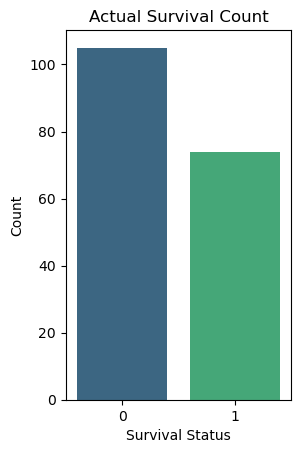

In [76]:
# Actual survival count
plt.subplot(1, 2, 1)
sns.countplot(x='Actual', data=results, palette='viridis')
plt.title('Actual Survival Count')
plt.ylabel('Count')
plt.xlabel('Survival Status')

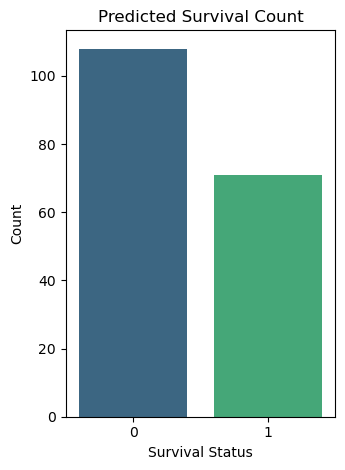

In [77]:
# Predicted survival count
plt.subplot(1, 2, 2)
sns.countplot(x='Predicted', data=results, palette='viridis')
plt.title('Predicted Survival Count')
plt.ylabel('Count')
plt.xlabel('Survival Status')

plt.tight_layout()
plt.show()

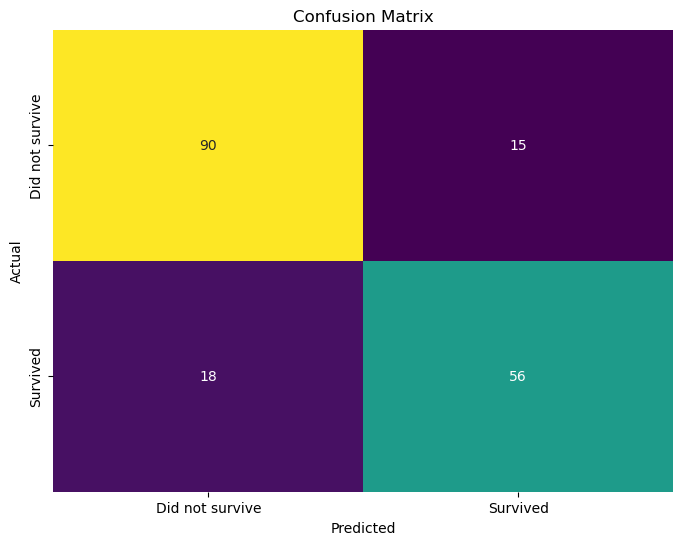

In [82]:
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Did not survive', 'Survived'],
            yticklabels=['Did not survive', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()